In [1]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load dataset

df = pd.read_csv("data.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Copy data
df_encoded = df.copy()

# Handle categorical columns
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Force numeric conversion
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Fill remaining NaNs with mean
df_encoded = df_encoded.fillna(df_encoded.mean())

# Final NaN check
if df_encoded.isnull().sum().sum() > 0:
    df_encoded = df_encoded.fillna(0)

# Remove target column if present
if 'diagnosis' in df_encoded.columns:
    X = df_encoded.drop('diagnosis', axis=1).values
else:
    X = df_encoded.values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("NaNs in features:", np.isnan(X_scaled).sum())

NaNs in features: 0


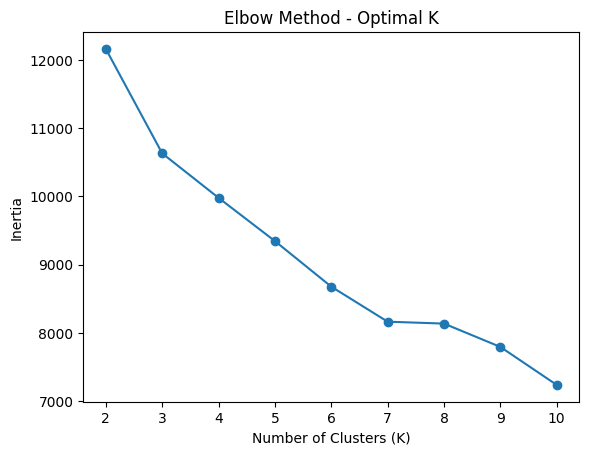

In [4]:
# Elbow Method for Optimal K

inertia_values = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal K')
plt.show()

In [6]:
# Choose K (based on elbow method result)

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Silhouette score

score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score (K={optimal_k}): {score:.4f}")

Silhouette Score (K=2): 0.3382


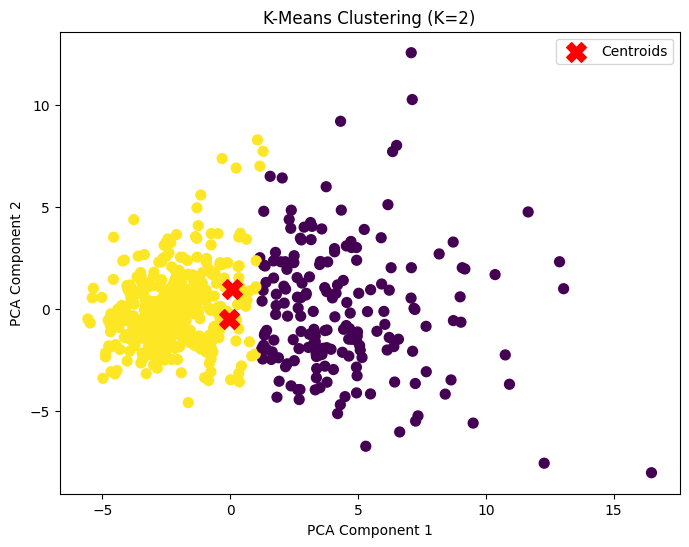

In [7]:
# Reduce to 2D with PCA if needed

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.legend()
plt.show()